In [2]:
import numpy as np
import itertools
import time
from tqdm import tqdm
from sklearn.metrics import normalized_mutual_info_score as nmi
import matplotlib.pyplot as plt

import hmm

In [4]:
data = np.loadtxt('./spikes.txt')

times = data[0, :]
firings = data[1, :]

times, indices = np.unique(times, return_index=True)
firings = firings[indices].astype(int)

In [5]:
new_times = np.linspace(0.001, 10, 10000)
new_firings = np.zeros_like(new_times).astype(int)

# Find the indices where the times are registered
indices = np.searchsorted(new_times, times)
new_firings[indices] = firings

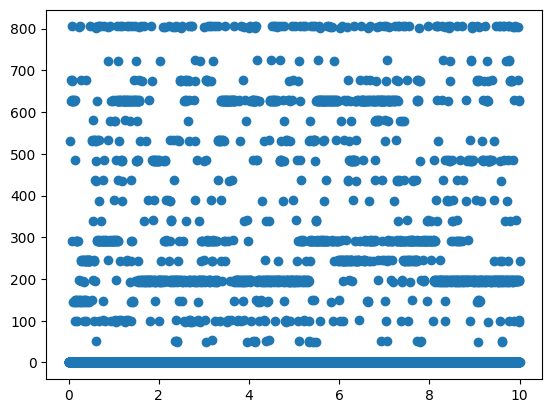

In [6]:
plt.scatter(new_times, new_firings)

In [19]:
%%capture

N = 805  # neurons
K = 4  # states
T = len(new_times)  # time steps
seed = 1234 
num_rep = 10

#input: initialization of the parameters for the HMM
pi, gamma, r = hmm.initialize_parameters(N, K, seed)

# pi=np.array([1,0])
# gamma=np.array([[0.9,0.1],[0.1,0.9]]) 
# r=np.array([[1,0],
#             [0,1],
#             [1,0],
#             [0,1]])



type_run = "Real data, K=2 (unbalanced gamma)"


pis, gammas, rs = hmm.run_simulation(N, K, T, seed, num_rep, pi, gamma, r, type_run)


nmis = []

for i in range(num_rep):
    pi = pis[i]
    gamma = gammas[i]
    r = rs[i]
    y, z = hmm.generate_hmm_data(T, N, K, pi, gamma, r)

    nmi_value = nmi(labels_true=new_firings, labels_pred=y)
    nmis.append(nmi_value)


In [20]:
nmis

[np.float64(0.12087901111798072),
 np.float64(0.12165887521137408),
 np.float64(0.12062802354842474),
 np.float64(0.11984320918709707),
 np.float64(0.12087240303898299),
 np.float64(0.12076724466983733),
 np.float64(0.12108752664651849),
 np.float64(0.12157896369051832),
 np.float64(0.1209964359733426),
 np.float64(0.12129113641754596)]

In [14]:
%%capture

N = 805  # neurons
K = 3  # states
T = len(new_times)  # time steps
seed = 1234 
num_rep = 10

#input: initialization of the parameters for the HMM
pi, gamma, r = hmm.initialize_parameters(N, K, seed)

# pi=np.array([1,0])
# gamma=np.array([[0.9,0.05,0.05],
#                 [0.05,0.9,0.05],
#                 [0.05,0.05,0.9]])
# r=np.array([[1,0],
#             [0,1],
#             [1,0],
#             [0,1]])



type_run = "Real data, K=2 (unbalanced gamma)"


pis, gammas, rs = hmm.run_simulation(N, K, T, seed, num_rep, pi, gamma, r, type_run)



nmis = []

for i in range(num_rep):
    pi = pis[i]
    gamma = gammas[i]
    r = rs[i]
    y, z = hmm.generate_hmm_data(T, N, K, pi, gamma, r)

    nmi_value = nmi(labels_true=new_firings, labels_pred=y)
    nmis.append(nmi_value)
    

In [15]:
nmis

[np.float64(0.1192177080821377),
 np.float64(0.12199744085159506),
 np.float64(0.12137510236126753),
 np.float64(0.11994105113183355),
 np.float64(0.12048296534602597),
 np.float64(0.11940088467138527),
 np.float64(0.1204247992581553),
 np.float64(0.11988526395316043),
 np.float64(0.11883122936950281),
 np.float64(0.11260753882266218)]